<h3>2019104035 장서연 - 머신러닝 과제 1의 (3)번

# 3. 베이즈 가우시안 혼합 모델 

<h3><목차></h3>

(1) make_blobs 레이블이 없는 데이터셋을 생성한다. (주교재의 그림9-2)<br>
(2) (1)의 데이터셋을 그림으로 그린다.<br>
(3) 베이즈 가우시안 혼합 모델을 사용하여 농도 가중치(weight_concentration_prior)<br>파라미터 값을 조정하면서 최적 클러스터 개수를 정한다.<br>
(4) 센트로이드와 결정 경계를 포함한 클러스터링 결과를 그림으로 그려 비교한다.

<b>1. make_blobs 레이블이 없는 데이터셋을 생성한다. (주교재의 그림9-2)

In [4]:
from sklearn.datasets import make_blobs
import numpy as np

그냥 교재에 나오는 방법대로만 데이터셋을 만들면, 데이터가 너무 빽빽한 부분이 생겨서<br>
후에 밀도 등고선을 그릴 때 오류가 자주 나더라구요.<br>
그래서 제가  make_blob 함수와, 주교재 9-2의 코드를 조금 응용해서 데이터 셋을 자체적으로 만들어 보았습니다.<br>

In [173]:
blob_centers1=np.array(
    [[-1.5, 2.8],
    [-1.5, 1.8],
    [-1.5, -1.3]])

blob_centers2 = np.array(
    [[1.2, 2.3],
    [0.5, 0.3]])

blob_std1 = np.array([0.2, 0.2, 0.2])
blob_std2 = np.array([0.5, 0.6])

X1, y1 = make_blobs(n_samples = 400, centers = blob_centers1, cluster_std= blob_std1, random_state = 7 )
X2, y2 = make_blobs(n_samples = 500, centers = blob_centers2, cluster_std= blob_std2, random_state = 7 )

X = np.r_[X1, X2]
y = np.r_[y1, y2]

<b>2. (1)의 데이터셋을 그림으로 그린다.

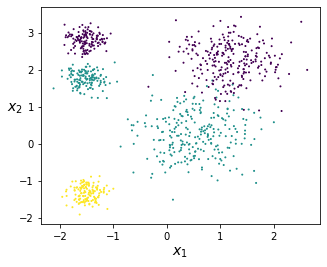

<Figure size 576x288 with 0 Axes>

In [211]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:,1],c=y,s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))

plt.show()

가중치 농도를 비교하기 전에, 일반적인 베이즈 가우시안 혼합모델이 어떻게 군집을 나누는지 그래프를 그려보겠습니다. <br>
앞으로 그림을 계속 그려야 하므로, 미리 그림을 그리는데 필요한 함수들을 세팅하도록 하겠습니다.

In [109]:
from matplotlib.colors import LogNorm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [39]:
from sklearn.mixture import BayesianGaussianMixture

먼저, 그냥 베이즈 가우시안 모델을 학습시켜 어떤 군집을 만드는지 확인해 보겠습니다.<br>
make_blob를 이용한 데이터는 클러스터 5개 정도면 분류가 가능할 것으로 보이므로, <br>
베이즈 가우시안에서는 그보다 많은 클러스터 수, 10개로 지정해 보겠습니다.

In [140]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

5개 정도의 클러스터를 만들었으리라 생각하는데, 한번 확인해보겠습니다.

In [202]:
np.round(bgm.weights_, 2)

array([0.29, 0.15, 0.27, 0.15, 0.15, 0.  , 0.  , 0.  , 0.  , 0.  ])

↑ 정말 5개의 클러스터를 만들었네요!

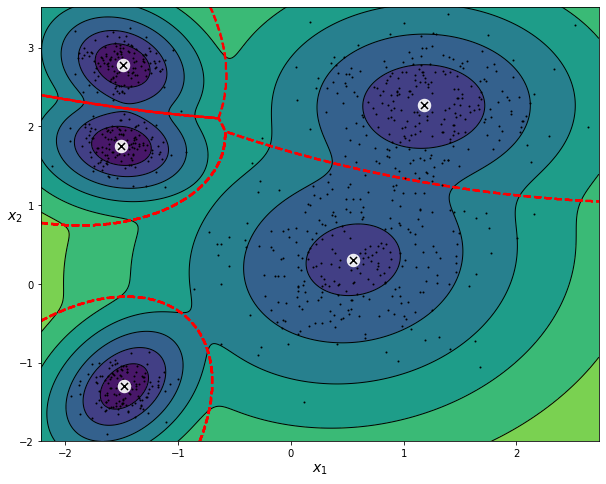

In [209]:
plt.figure(figsize=(10, 8))
plot_gaussian_mixture(bgm, X)
plt.show()

<b>3. 베이즈 가우시안 혼합 모델을 사용하여 농도 가중치(weight_concentration_prior)
파라미터 값을 조정하면서 최적 클러스터 개수를 정한다.

이제, 가중치(weight_concentration_prior) 변수의 조작을 해보겠습니다.<br>
<b>학습시킬 데이터가 적으면 적을 수록 가중치의 역할이 극대화 될것 같아서</b>, 학습 데이터수를 20개로 대폭 줄여봤습니다.

In [203]:
bgm_low = BayesianGaussianMixture(n_components = 10, max_iter = 1000, n_init = 1,
                                 weight_concentration_prior =0.001, random_state = 42)
bgm_high = BayesianGaussianMixture(n_components = 10, max_iter=1000, n_init = 1, 
                                   weight_concentration_prior =10000, random_state = 42)


nn = 20 #데이터수를 대폭 줄여본 모습입니다.
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [204]:
print("bgm_low의 클러스터 가중치: ", np.round(bgm_low.weights_, 2) )
print("bgm_high의 클러스터 가중치: ", np.round(bgm_high.weights_, 2) )

bgm_low의 클러스터 가중치:  [0.52 0.05 0.43 0.   0.   0.   0.   0.   0.   0.  ]
bgm_high의 클러스터 가중치:  [0.29 0.04 0.36 0.04 0.11 0.04 0.04 0.04 0.04 0.04]


벌써부터, 극명하게 값 차이가 나는 매개변수로 클러스터의 갯수도 다른 것을 확인할 수 있습니다.<br>

<b>4. 센트로이드와 결정 경계를 포함한 클러스터링 결과를 그림으로 그려 비교한다.

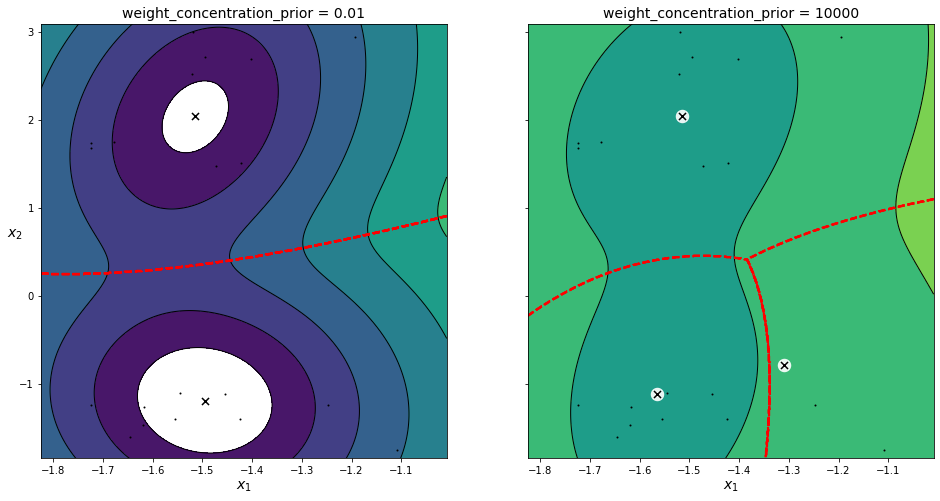

In [206]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()

가중치 값이 달라질 때 어떻게 클러스터 수에 차이가 생기는지 확인은 할 수 있었지만, <b>데이터 수가 너무 적어서</b><br>
과소적합이 일어난 모습입니다. 그렇다면 원래 수의 데이터 셋에도 가중치를 적용시켜 최적의 클러스터를 구해보겠습니다.

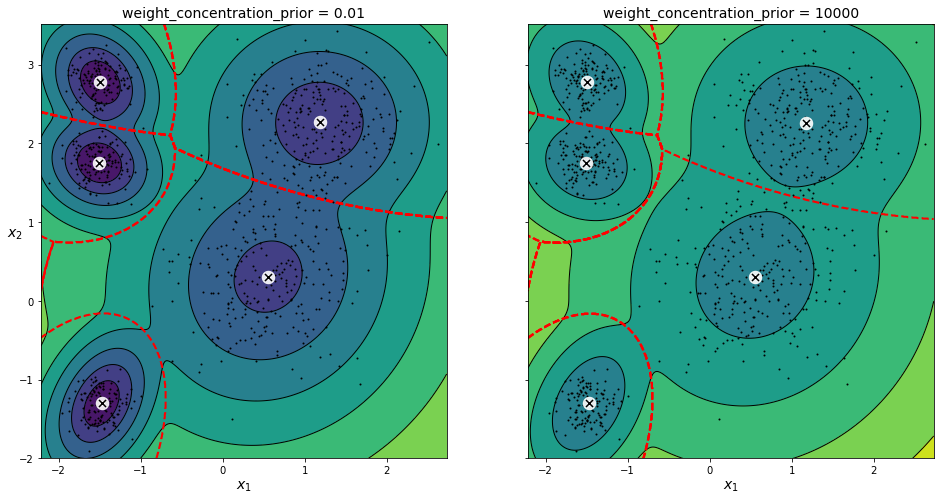

In [207]:
bgm_low.fit(X)
bgm_high.fit(X)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X)
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X, show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()

데이터 수가 늘어나니 큰 차이가 없어보이네요, 결국 최적의 클러스터 수는 5개임을 확인할 수 있습니다!